In [60]:
import pandas as pd


mcdonalds = pd.read_csv('/content/drive/MyDrive/FeynnLabs/mcdonalds.csv')


print(mcdonalds.columns)


print(mcdonalds.shape)


print(mcdonalds.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [2]:
import numpy as np

MD_x = mcdonalds.iloc[:, 0:11].to_numpy()


MD_x = (MD_x == "Yes").astype(int)


column_means = np.round(MD_x.mean(axis=0), 2)


mean_df = pd.DataFrame({
    'Column': mcdonalds.columns[0:11],
    'Mean': column_means
})

print(mean_df)

        Column  Mean
0        yummy  0.55
1   convenient  0.91
2        spicy  0.09
3    fattening  0.87
4       greasy  0.53
5         fast  0.90
6        cheap  0.60
7        tasty  0.64
8    expensive  0.36
9      healthy  0.20
10  disgusting  0.24


In [3]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(MD_x)


std_dev = np.round(pca.singular_values_, 4)


explained_variance = np.round(pca.explained_variance_ratio_, 4)


cumulative_proportion = np.round(np.cumsum(explained_variance), 4)


pca_summary = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(std_dev))],
    'Standard Deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_proportion
})

print(pca_summary)


      PC  Standard Deviation  Proportion of Variance  Cumulative Proportion
0    PC1             28.8475                  0.2994                 0.2994
1    PC2             23.1472                  0.1928                 0.4922
2    PC3             19.2286                  0.1330                 0.6252
3    PC4             15.1963                  0.0831                 0.7083
4    PC5             12.8569                  0.0595                 0.7678
5    PC6             11.8231                  0.0503                 0.8181
6    PC7             11.0390                  0.0438                 0.8619
7    PC8             10.4836                  0.0395                 0.9014
8    PC9             10.1074                  0.0368                 0.9382
9   PC10              9.4821                  0.0324                 0.9706
10  PC11              9.0272                  0.0293                 0.9999


In [4]:

# Obtain the PCA loadings (components)
loadings = pca.components_.T  # Transpose to match the shape (features x PCs)

# Create a DataFrame for the loadings matrix
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=mcdonalds.columns[0:11])

# Round the loadings for better readability
loadings_df = loadings_df.round(3)

print("Standard Deviations:")
print(np.round(pca.singular_values_, 1))

print("\nRotation (Loadings) Matrix:")
print(loadings_df)


Standard Deviations:
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]

Rotation (Loadings) Matrix:
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 

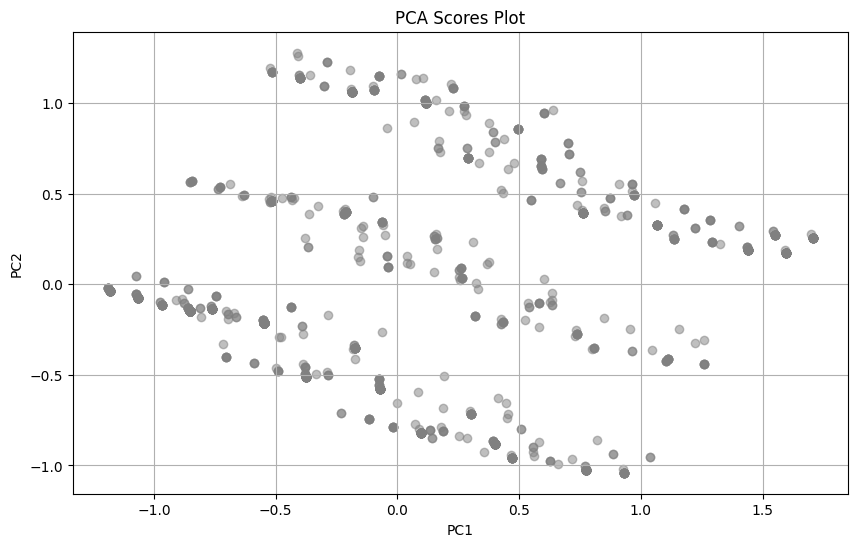

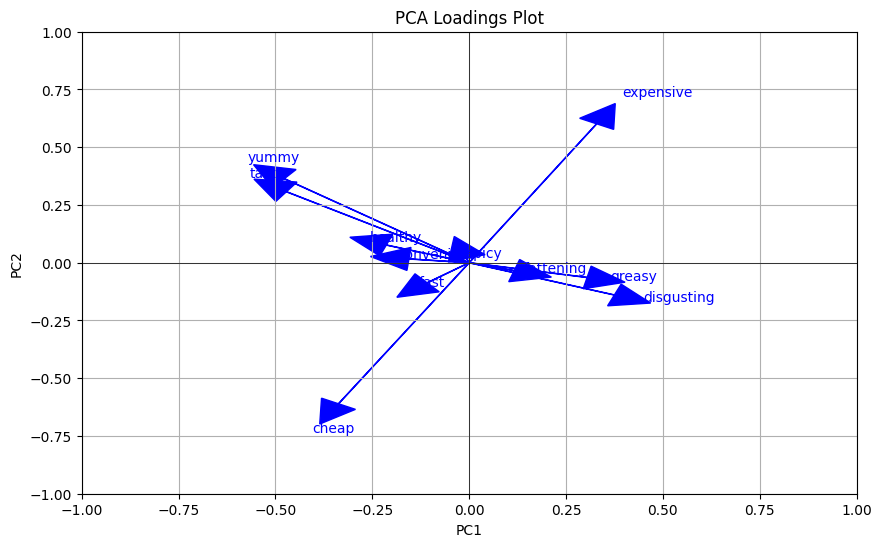

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Project the data onto the principal components
pca_scores = pca.transform(MD_x)

# Create a DataFrame for PCA scores
pca_scores_df = pd.DataFrame(pca_scores, columns=[f'PC{i+1}' for i in range(pca_scores.shape[1])])

# Plot PCA scores
plt.figure(figsize=(10, 6))
plt.scatter(pca_scores_df['PC1'], pca_scores_df['PC2'], color='grey', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scores Plot')
plt.grid(True)
plt.show()

# Plot PCA loadings (projected axes)
plt.figure(figsize=(10, 6))

# Plot PCA loadings
for i, feature in enumerate(mcdonalds.columns[0:11]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.1, head_length=0.1, color='blue')
    plt.text(pca.components_[0, i]*1.2, pca.components_[1, i]*1.2, feature, color='blue')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Loadings Plot')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Set seed for reproducibility
np.random.seed(1234)

# Function to perform k-means clustering and evaluate silhouette scores
def perform_kmeans(X, n_clusters_range, n_init=10):
    best_kmeans = None
    best_score = -1
    scores = []

    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
        kmeans.fit(X)
        labels = kmeans.labels_

        # Calculate silhouette score
        score = silhouette_score(X, labels)
        scores.append(score)

        if score > best_score:
            best_score = score
            best_kmeans = kmeans

    return best_kmeans, scores

# Perform k-means clustering for cluster sizes 2 to 8
n_clusters_range = range(2, 9)
best_kmeans, silhouette_scores = perform_kmeans(MD_x, n_clusters_range)

# Get cluster labels
cluster_labels = best_kmeans.labels_


print("Best k-Means model with clusters:", best_kmeans.n_clusters)
print("Silhouette Scores for each k:", silhouette_scores)
print("Cluster Labels:", cluster_labels)


Best k-Means model with clusters: 8
Silhouette Scores for each k: [0.24441701827275675, 0.23915373940875356, 0.256821716312148, 0.2612871730877041, 0.2716093535523477, 0.2795180738626384, 0.28648799619628673]
Cluster Labels: [4 2 5 ... 5 3 0]


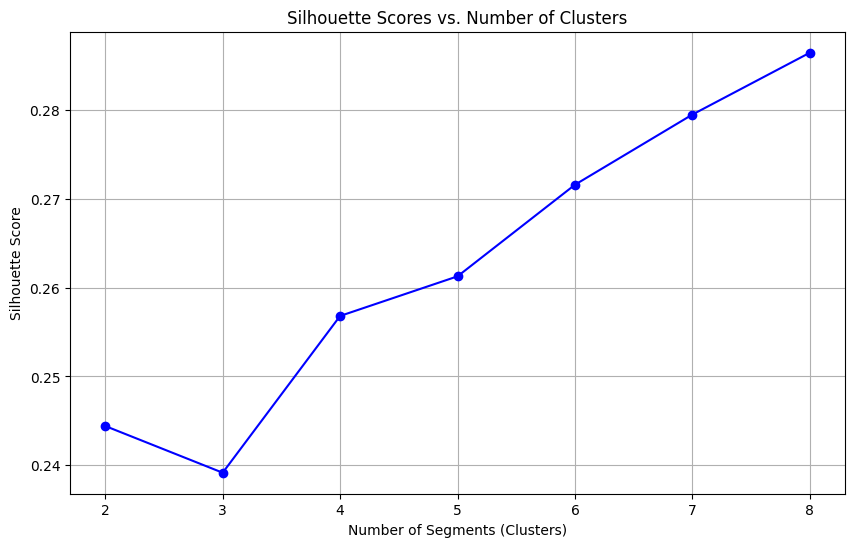

In [7]:


# Perform k-means clustering for cluster sizes 2 to 8
n_clusters_range = range(2, 9)
best_kmeans, silhouette_scores = perform_kmeans(MD_x, n_clusters_range)

# Plot silhouette scores versus number of clusters
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.grid(True)
plt.show()


In [8]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score


def bootstrapped_kmeans(X, n_clusters_range, n_boot=100, n_init=10, random_state=1234):
    np.random.seed(random_state)
    ari_scores = {k: [] for k in n_clusters_range}

    for n_clusters in n_clusters_range:
        for _ in range(n_boot):
            # Bootstrap sampling
            X_resampled = resample(X, random_state=random_state)

            # Fit k-means on the resampled data
            kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
            kmeans.fit(X_resampled)

            # Get labels for the resampled data
            labels_resampled = kmeans.labels_

            # Calculate ARI by comparing with labels from the original data
            original_kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
            original_kmeans.fit(X)
            labels_original = original_kmeans.labels_

            ari = adjusted_rand_score(labels_original, labels_resampled)
            ari_scores[n_clusters].append(ari)

    # Calculate mean ARI for each number of clusters
    mean_ari_scores = {k: np.mean(v) for k, v in ari_scores.items()}

    return mean_ari_scores


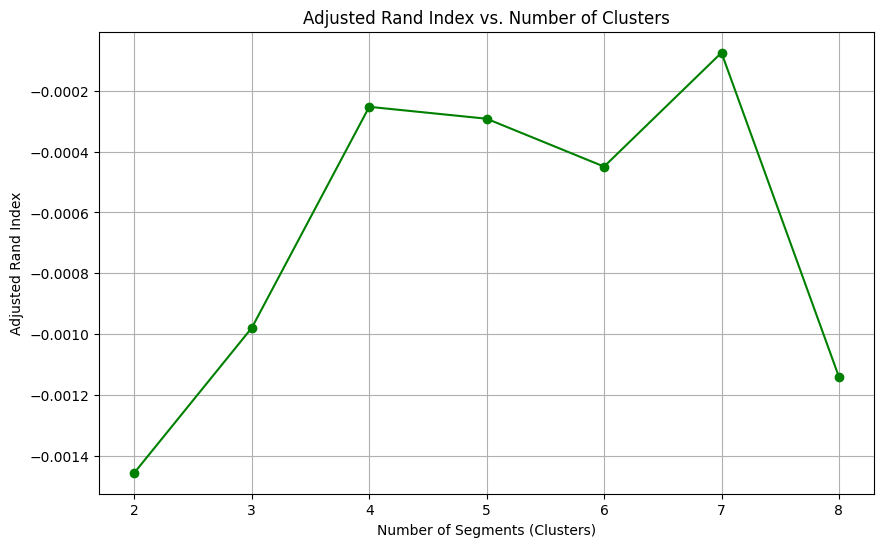

In [9]:


# Perform bootstrapped k-means clustering for cluster sizes 2 to 8
n_clusters_range = range(2, 9)
mean_ari_scores = bootstrapped_kmeans(MD_x, n_clusters_range, n_boot=100)

# Plot ARI scores versus number of clusters
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, [mean_ari_scores[k] for k in n_clusters_range], marker='o', linestyle='-', color='green')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs. Number of Clusters')
plt.grid(True)
plt.show()


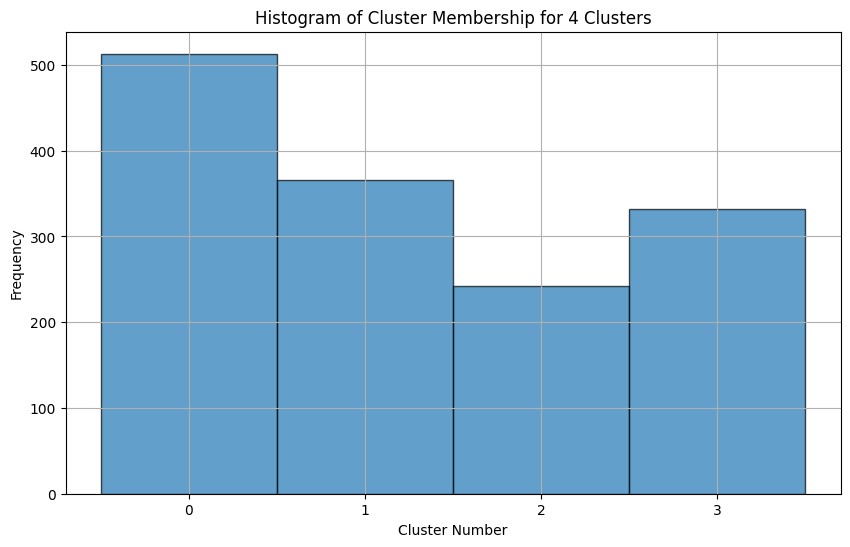

In [10]:


# Number of clusters to visualize
n_clusters_to_plot = 4

# Fit k-means with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters_to_plot, n_init=10, random_state=1234)
kmeans.fit(MD_x)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a DataFrame for the cluster memberships
df_clusters = pd.DataFrame({'Cluster': cluster_labels})

# Plot histogram of cluster membership for the specified number of clusters
plt.figure(figsize=(10, 6))
plt.hist(df_clusters['Cluster'], bins=np.arange(n_clusters_to_plot + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(n_clusters_to_plot))
plt.xlabel('Cluster Number')
plt.ylabel('Frequency')
plt.title(f'Histogram of Cluster Membership for {n_clusters_to_plot} Clusters')
plt.grid(True)
plt.show()


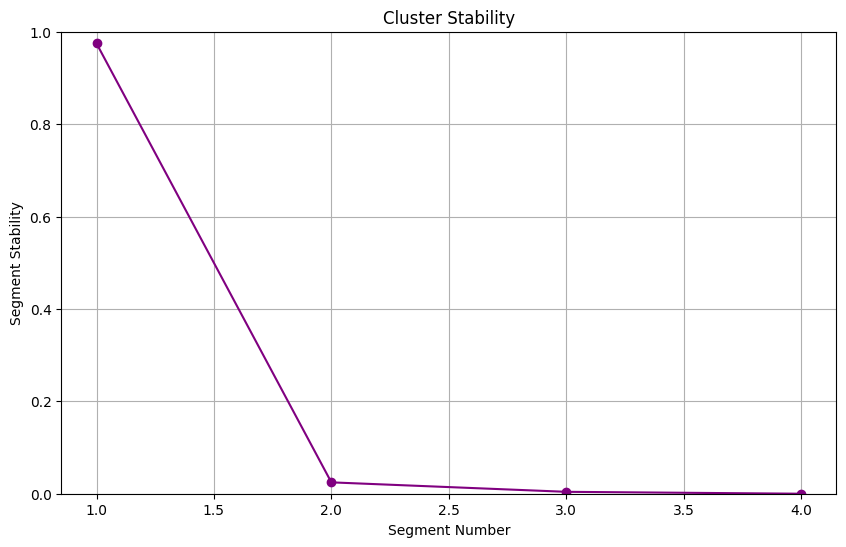

In [11]:
from sklearn.cluster import KMeans
from sklearn.utils import resample

def cluster_stability(X, kmeans, n_boot=100, random_state=1234):
    np.random.seed(random_state)
    n_clusters = kmeans.n_clusters
    stability_scores = np.zeros(n_clusters)

    # Assignments for original data
    original_labels = kmeans.labels_

    for _ in range(n_boot):
        # Bootstrap sampling
        X_resampled = resample(X, random_state=random_state)

        # Fit k-means on the resampled data
        kmeans_resampled = KMeans(n_clusters=n_clusters, n_init=kmeans.n_init, random_state=random_state)
        kmeans_resampled.fit(X_resampled)

        # Get cluster labels for the resampled data
        labels_resampled = kmeans_resampled.predict(X)

        # Calculate stability score for each cluster
        for cluster in range(n_clusters):
            # Find indices of points in this cluster
            original_indices = np.where(original_labels == cluster)[0]
            resampled_indices = np.where(labels_resampled == cluster)[0]

            # Calculate intersection size
            intersection_size = len(np.intersect1d(original_indices, resampled_indices))
            stability_scores[cluster] += intersection_size / len(original_indices)

    # Average stability scores
    stability_scores /= n_boot

    return stability_scores

# Number of clusters to analyze
n_clusters = 4

# Fit k-means with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
kmeans.fit(MD_x)

# Compute stability scores for each cluster
stability_scores = cluster_stability(MD_x, kmeans, n_boot=100)

# Create a DataFrame for the stability scores
stability_df = pd.DataFrame({
    'Segment Number': range(1, n_clusters + 1),
    'Segment Stability': stability_scores
})

# Plot stability scores
plt.figure(figsize=(10, 6))
plt.plot(stability_df['Segment Number'], stability_df['Segment Stability'], marker='o', linestyle='-', color='purple')
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Cluster Stability')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


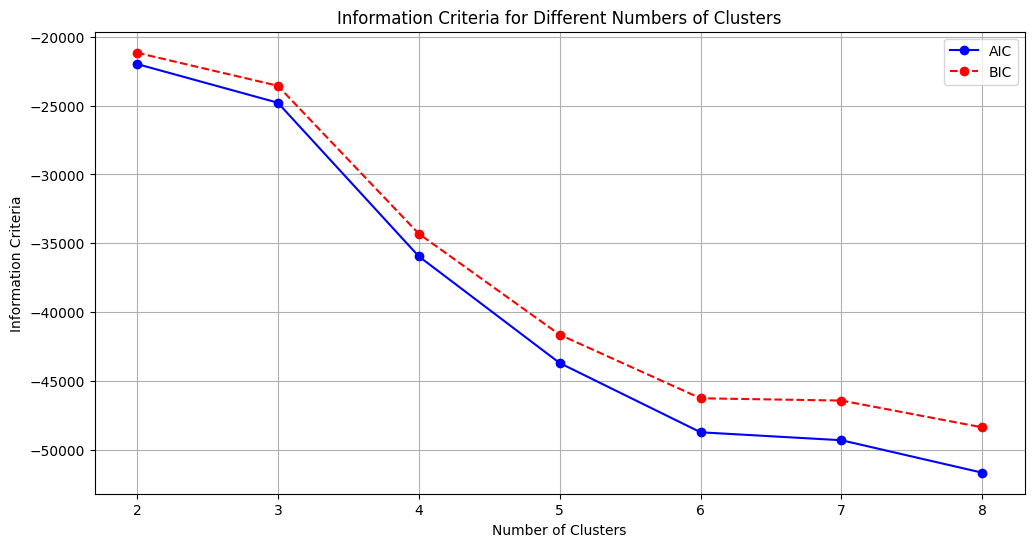

In [12]:
from sklearn.mixture import GaussianMixture

def compute_criteria(X, n_components_range, criterion='AIC'):
    """
    Compute AIC, BIC, or ICL for a range of mixture models.
    """
    aic = []
    bic = []

    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
        gmm.fit(X)

        # Compute criteria
        if criterion == 'AIC':
            aic.append(gmm.aic(X))
        elif criterion == 'BIC':
            bic.append(gmm.bic(X))

    return aic, bic

# Define range of number of components (clusters)
n_components_range = range(2, 9)

# Compute AIC and BIC
aic, bic = compute_criteria(MD_x, n_components_range, criterion='AIC')
_, bic = compute_criteria(MD_x, n_components_range, criterion='BIC')

# Create a DataFrame for plotting
criteria_df = pd.DataFrame({
    'Number of Clusters': n_components_range,
    'AIC': aic,
    'BIC': bic
})

# Plot the information criteria
plt.figure(figsize=(12, 6))
plt.plot(criteria_df['Number of Clusters'], criteria_df['AIC'], marker='o', linestyle='-', color='blue', label='AIC')
plt.plot(criteria_df['Number of Clusters'], criteria_df['BIC'], marker='o', linestyle='--', color='red', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Information Criteria')
plt.title('Information Criteria for Different Numbers of Clusters')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Fit k-means with a specified number of clusters
n_clusters_kmeans = 4
kmeans = KMeans(n_clusters=n_clusters_kmeans, n_init=10, random_state=1234)
kmeans.fit(MD_x)
kmeans_labels = kmeans.labels_

# Fit Gaussian Mixture Model with the same number of clusters
gmm = GaussianMixture(n_components=n_clusters_kmeans, n_init=10, random_state=1234)
gmm.fit(MD_x)
gmm_labels = gmm.predict(MD_x)

# Create a contingency table
contingency_table = pd.crosstab(kmeans_labels, gmm_labels, rownames=['kmeans'], colnames=['mixture'])

print("Contingency Table:")
print(contingency_table)


Contingency Table:
mixture    0   1   2    3
kmeans                   
0        449   1  42   21
1        288  36   5   37
2          0  87   2  153
3          0   8  77  247


In [14]:
# Fit k-means with a specified number of clusters
n_clusters_kmeans = 4
kmeans = KMeans(n_clusters=n_clusters_kmeans, n_init=10, random_state=1234)
kmeans.fit(MD_x)
kmeans_labels = kmeans.labels_

# Fit Gaussian Mixture Model with predefined clusters
gmm = GaussianMixture(n_components=n_clusters_kmeans, init_params='kmeans', n_init=10, random_state=1234)
gmm.fit(MD_x)
gmm_labels = gmm.predict(MD_x)

# Fit another Gaussian Mixture Model using kmeans labels as initial clusters
gmm_from_kmeans = GaussianMixture(n_components=n_clusters_kmeans, n_init=10, random_state=1234)
gmm_from_kmeans.fit(MD_x)

# Get cluster assignments from both models
kmeans_clusters = kmeans_labels
gmm_clusters = gmm_from_kmeans.predict(MD_x)

# Create a contingency table
contingency_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['kmeans'], colnames=['mixture'])

print("Contingency Table:")
print(contingency_table)


Contingency Table:
mixture    0   1   2    3
kmeans                   
0        449   1  42   21
1        288  36   5   37
2          0  87   2  153
3          0   8  77  247


In [15]:
from sklearn.mixture import GaussianMixture


# Fit k-means with a specified number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
kmeans.fit(MD_x)
kmeans_labels = kmeans.labels_

# Fit Gaussian Mixture Model from scratch
gmm_from_scratch = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
gmm_from_scratch.fit(MD_x)
log_likelihood_scratch = gmm_from_scratch.score(MD_x) * MD_x.shape[0]

# Fit Gaussian Mixture Model with k-means initialization
gmm_with_kmeans = GaussianMixture(n_components=n_clusters, init_params='kmeans', n_init=10, random_state=1234)
gmm_with_kmeans.fit(MD_x)
log_likelihood_with_kmeans = gmm_with_kmeans.score(MD_x) * MD_x.shape[0]

print(f"Log-Likelihood for GMM from scratch: {log_likelihood_scratch:.3f}")
print(f"Log-Likelihood for GMM with k-means initialization: {log_likelihood_with_kmeans:.3f}")


Log-Likelihood for GMM from scratch: 18280.115
Log-Likelihood for GMM with k-means initialization: 18280.115


In [16]:
responses = ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5']
counts = [152, 71, 73, 59, 58, 169, 152, 187, 229, 160, 143]

# Generate the data
data = {'Like': [resp for resp, count in zip(responses, counts) for _ in range(count)]}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Like' column to numeric, handling the '+' signs
df['Like'] = df['Like'].replace({'\+': ''}, regex=True).astype(int)

# Reverse the scale
df['Like_n'] = 6 - df['Like']

# Count occurrences of each reversed response
like_n_counts = df['Like_n'].value_counts().sort_index()

print("Reversed Scale Counts:")
print(like_n_counts)


Reversed Scale Counts:
Like_n
1     143
2     160
3     229
4     187
5     152
6     169
7      58
8      59
9      73
10     71
11    152
Name: count, dtype: int64


In [17]:
!pip install patsy

In [21]:
import patsy
import statsmodels.api as sm

# Convert categorical columns to numerical representations
categorical_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'VisitFrequency', 'Gender', 'Like']
mcdonalds[categorical_cols] = mcdonalds[categorical_cols].apply(lambda x: pd.factorize(x)[0])

# Verify the DataFrame after conversion
print("Converted DataFrame:\n", mcdonalds.head())

# Create the formula string
features = '+'.join(mcdonalds.columns[:11])
formula_str = f"Like ~ {features}"

# Use patsy to create design matrices from the formula
try:
    y, X = patsy.dmatrices(formula_str, data=mcdonalds)
    print("Formula string:", formula_str)
    print("Design matrices created successfully.")
except Exception as e:
    print("Error:", e)

# Add a constant term to the predictor matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


Converted DataFrame:
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           0      0          0       0     0      0      0          0   
1      1           0      0          0       1     0      0      1          0   
2      0           0      1          0       1     0      1      1          0   
3      1           0      0          0       1     0      0      1          1   
4      0           0      0          0       1     0      0      0          1   

   healthy  disgusting  Like  Age  VisitFrequency  Gender  
0        0           0     0   61               0       0  
1        0           0     1   51               0       0  
2        1           0     2   62               0       0  
3        0           1     3   69               1       0  
4        1           0     1   49               2       1  
Formula string: Like ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting
Design matrices create

In [22]:
# Set the seed for reproducibility
np.random.seed(1234)

# Select the features for clustering (excluding 'Like' and other non-numeric columns)
features = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Age']]

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(features)

# Predict the clusters
clusters = gmm.predict(features)

# Cluster sizes
cluster_sizes = np.bincount(clusters)

# Number of iterations until convergence
n_iter = gmm.n_iter_

print("Cluster sizes:")
print(cluster_sizes)
print(f"Convergence after {n_iter} iterations")


Cluster sizes:
[1045  408]
Convergence after 8 iterations


In [25]:
for cluster in range(2):
    print(f"\nCluster {cluster + 1} Summary:\n")
    cluster_data = mcdonalds[clusters == cluster]

    # Create the formula string
    features_str = '+'.join(mcdonalds.columns[:11])
    formula_str = f"Like ~ {features_str}"

    # Use patsy to create design matrices from the formula
    y, X = patsy.dmatrices(formula_str, data=cluster_data)

    # Add a constant term to the predictor matrix
    X = sm.add_constant(X)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(model.summary())



Cluster 1 Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.458
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           2.50e-05
Time:                        19:30:16   Log-Likelihood:                -2584.3
No. Observations:                1045   AIC:                             5187.
Df Residuals:                    1036   BIC:                             5231.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5726      0.36

Cluster sizes:
[1045  408]
Convergence after 8 iterations

Cluster 1 Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.458
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           2.50e-05
Time:                        19:37:23   Log-Likelihood:                -2584.3
No. Observations:                1045   AIC:                             5187.
Df Residuals:                    1036   BIC:                             5231.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

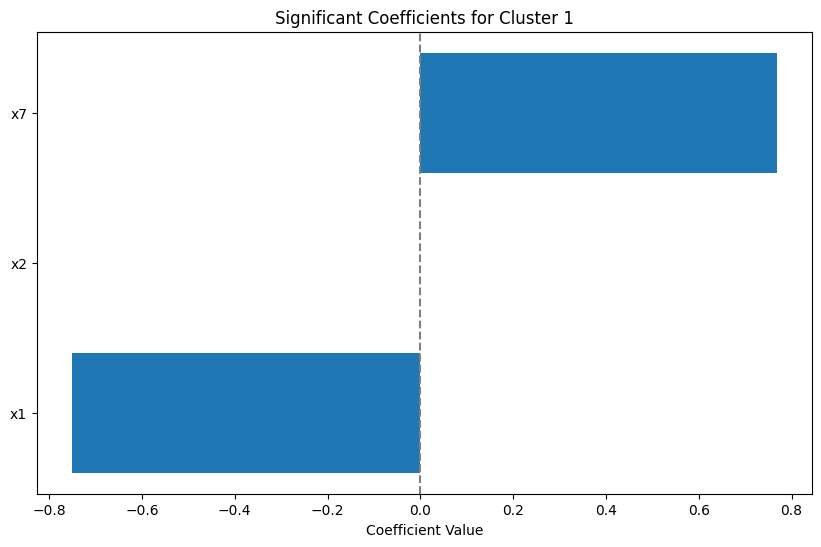


Cluster 2 Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.956
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           0.000883
Time:                        19:37:23   Log-Likelihood:                -971.21
No. Observations:                 408   AIC:                             1966.
Df Residuals:                     396   BIC:                             2015.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7452      0.72

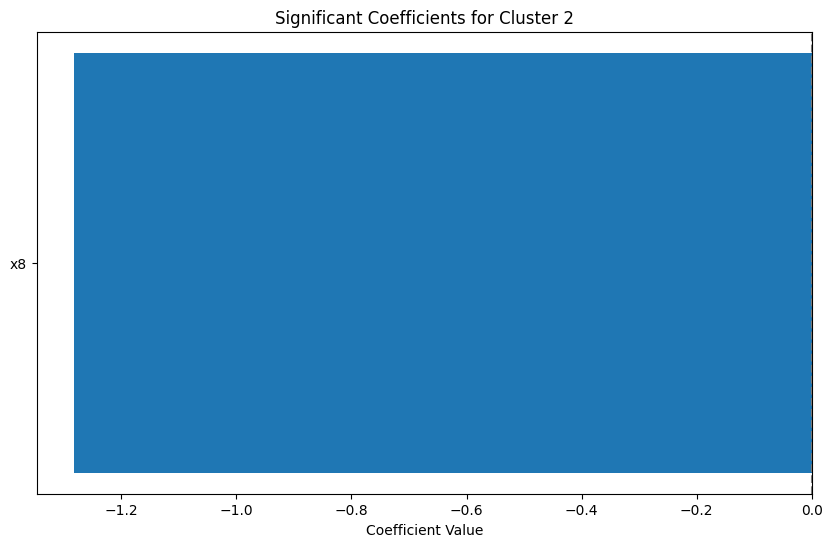

In [31]:

# Set the seed for reproducibility
np.random.seed(1234)

# Fit the Gaussian Mixture Model
features = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Age']]
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(features)

# Predict the clusters
clusters = gmm.predict(features)

# Cluster sizes
cluster_sizes = np.bincount(clusters)
print("Cluster sizes:")
print(cluster_sizes)

# Number of iterations until convergence
n_iter = gmm.n_iter_
print(f"Convergence after {n_iter} iterations")

# Refit models for each cluster and plot significant coefficients
for cluster in range(2):
    print(f"\nCluster {cluster + 1} Summary:\n")
    cluster_data = mcdonalds[clusters == cluster]

    # Create the formula string
    features_str = '+'.join(mcdonalds.columns[:11])
    formula_str = f"Like ~ {features_str}"

    # Use patsy to create design matrices from the formula
    y, X = patsy.dmatrices(formula_str, data=cluster_data)

    # Add a constant term to the predictor matrix
    X = sm.add_constant(X)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(model.summary())

    # Extract significant coefficients
    pvalues = model.pvalues
    params = model.params

    # Get feature names
    feature_names = model.model.exog_names

    # Create DataFrame with coefficients and p-values
    results_df = pd.DataFrame({
        'param': feature_names,
        'coef': params,
        'pvalue': pvalues
    })

    # Filter significant coefficients (pvalue < 0.05 and not 'const')
    significant_results = results_df[(results_df['pvalue'] < 0.05) & (results_df['param'] != 'const')]

    # Plot significant coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(significant_results['param'], significant_results['coef'])
    plt.xlabel('Coefficient Value')
    plt.title(f'Significant Coefficients for Cluster {cluster + 1}')
    plt.axvline(x=0, color='grey', linestyle='--')
    plt.show()


In [32]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

# Transpose MD.x and compute the distance matrix
dist_matrix = pdist(MD_x.T)

# Perform hierarchical clustering
MD_vclust = linkage(dist_matrix, method='ward')


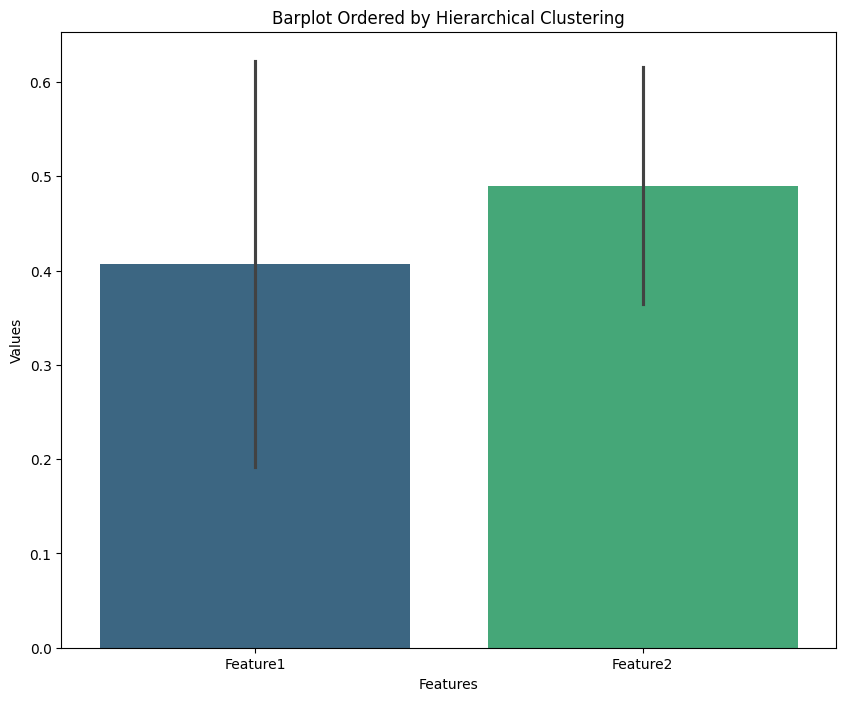

In [34]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

MD_k4 = pd.DataFrame({
    'Feature1': np.random.rand(20),
    'Feature2': np.random.rand(20)
}, index=[f'Item_{i}' for i in range(20)])

# Hierarchical clustering
MD_vclust = linkage(MD_k4.T, method='ward')

# Get order from clustering
dendro = dendrogram(MD_vclust, no_plot=True)
order = dendro['leaves']

# Reorder MD_k4 DataFrame based on hierarchical clustering order
MD_k4_ordered = MD_k4.iloc[order]

# Create a barplot with shading
plt.figure(figsize=(10, 8))
sns.barplot(data=MD_k4_ordered, palette='viridis')

# Customize the plot (e.g., set labels and title)
plt.title('Barplot Ordered by Hierarchical Clustering')
plt.xlabel('Features')
plt.ylabel('Values')

# Display the plot
plt.show()


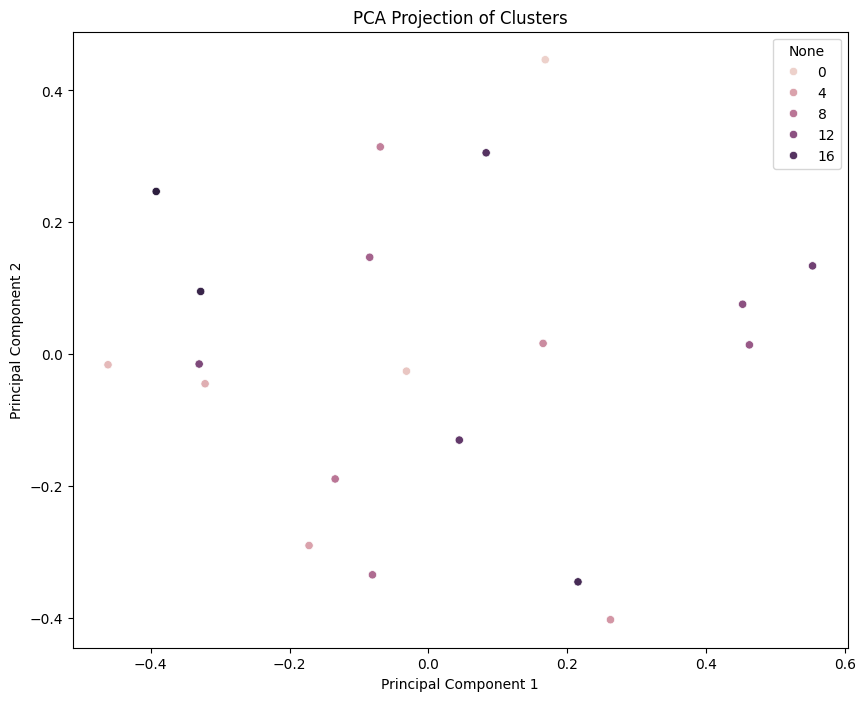

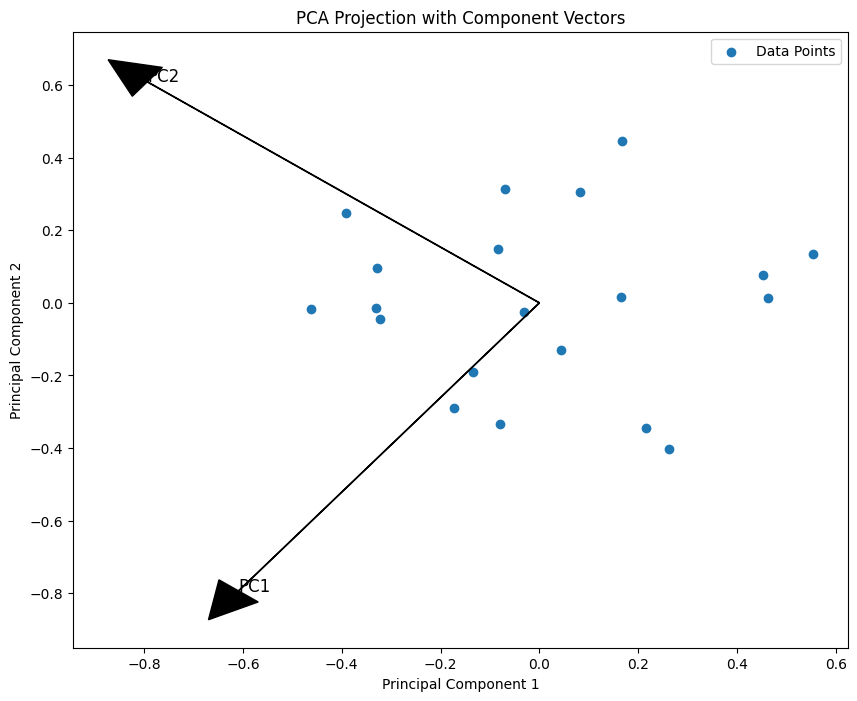

In [36]:
MD_k4 = pd.DataFrame({
    'Feature1': np.random.rand(20),
    'Feature2': np.random.rand(20)
})
MD_x = pd.DataFrame({
    'Feature1': np.random.rand(20),
    'Feature2': np.random.rand(20)
})


pca = PCA(n_components=2)  
MD_pca = pca.fit_transform(MD_x)

# Create a scatter plot for the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4.index)  
# Labeling the axes
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Clusters")

# Show the plot
plt.show()


# Plot PCA component vectors
plt.figure(figsize=(10, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], label='Data Points')

# Add PCA component vectors
for i, (comp, label) in enumerate(zip(pca.components_.T, ['PC1', 'PC2'])):
    plt.arrow(0, 0, comp[0], comp[1], head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.text(comp[0], comp[1], label, color='k', fontsize=12)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection with Component Vectors")
plt.legend()
plt.show()


In [37]:
!pip install statsmodels


<Figure size 1000x800 with 0 Axes>

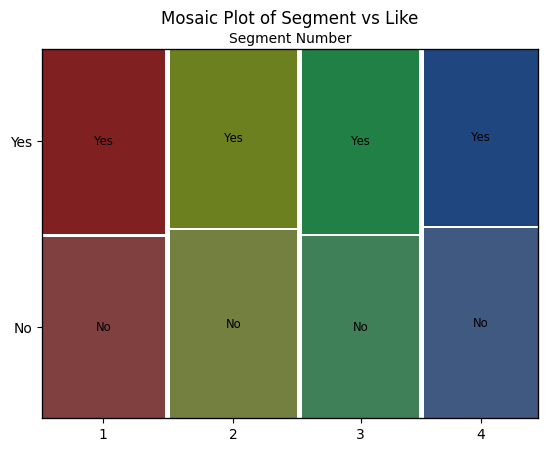

In [59]:
from statsmodels.graphics.mosaicplot import mosaic

# Example DataFrame 
mcdonalds1 = pd.DataFrame({
    'Like': np.random.choice(['Yes', 'No'], size=1450),
    'Segment': np.random.choice(range(1, 5), size=1450)
})

# Create a contingency table
contingency_table = pd.crosstab(mcdonalds1['Segment'], mcdonalds1['Like'])

# Plot mosaic plot
plt.figure(figsize=(10, 8))

# Define a labelizer function
def labelizer(key):
    return f'{key[1]}'

mosaic(contingency_table.stack(), title='', labelizer=labelizer, gap=0.01)
plt.xlabel('Segment Number')
plt.title('Mosaic Plot of Segment vs Like')
plt.show()


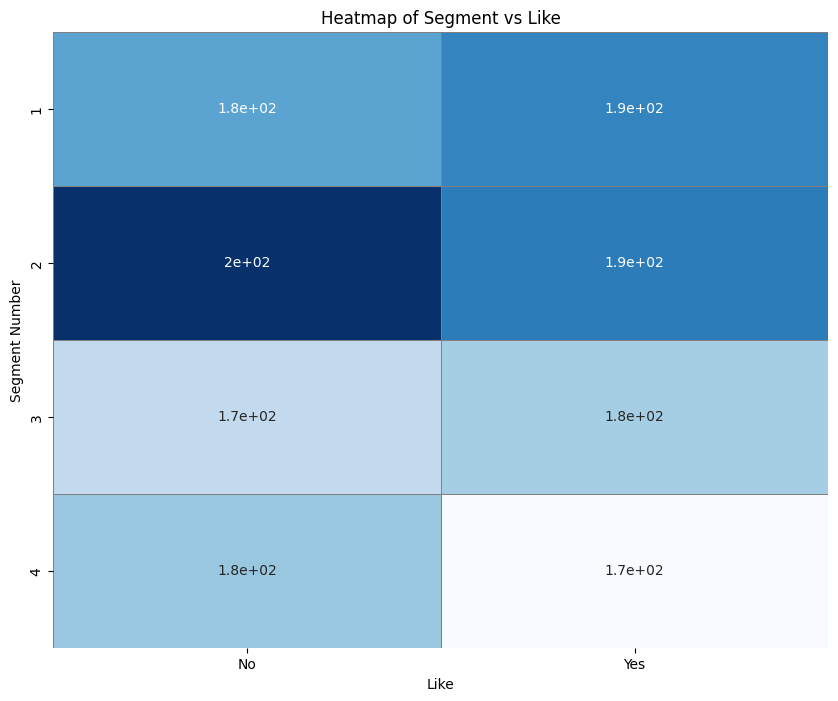

In [58]:

# Example DataFrame 
mcdonalds1 = pd.DataFrame({
    'Like': np.random.choice(['Yes', 'No'], size=1450),
    'Segment': np.random.choice(range(1, 5), size=1450)
})

# Create a contingency table
contingency_table = pd.crosstab(mcdonalds1['Segment'], mcdonalds1['Like'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')

plt.xlabel('Like')
plt.ylabel('Segment Number')
plt.title('Heatmap of Segment vs Like')
plt.show()

In [62]:
print(mcdonalds.columns)
print(mcdonalds['Gender'].isnull().sum())


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
0


<Figure size 1000x800 with 0 Axes>

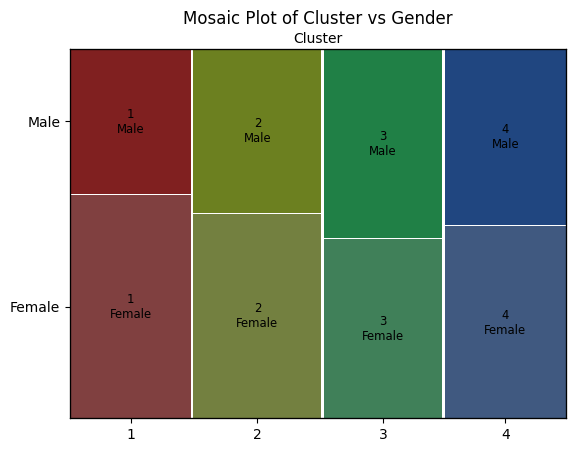

In [67]:
k4 = np.random.choice(range(1, 5), size=len(mcdonalds))  # Example kmeans_labels, replace with your actual labels

# Create a DataFrame with cluster labels and Gender
data = pd.DataFrame({
    'Cluster': k4,
    'Gender': mcdonalds['Gender']
})

# Create a contingency table
contingency_table = pd.crosstab(data['Cluster'], data['Gender'])

# Plot mosaic plot
plt.figure(figsize=(10, 8))
mosaic(contingency_table.stack(), title='Mosaic Plot of Cluster vs Gender')
plt.xlabel('Cluster')
plt.ylabel('Gender')
plt.show()


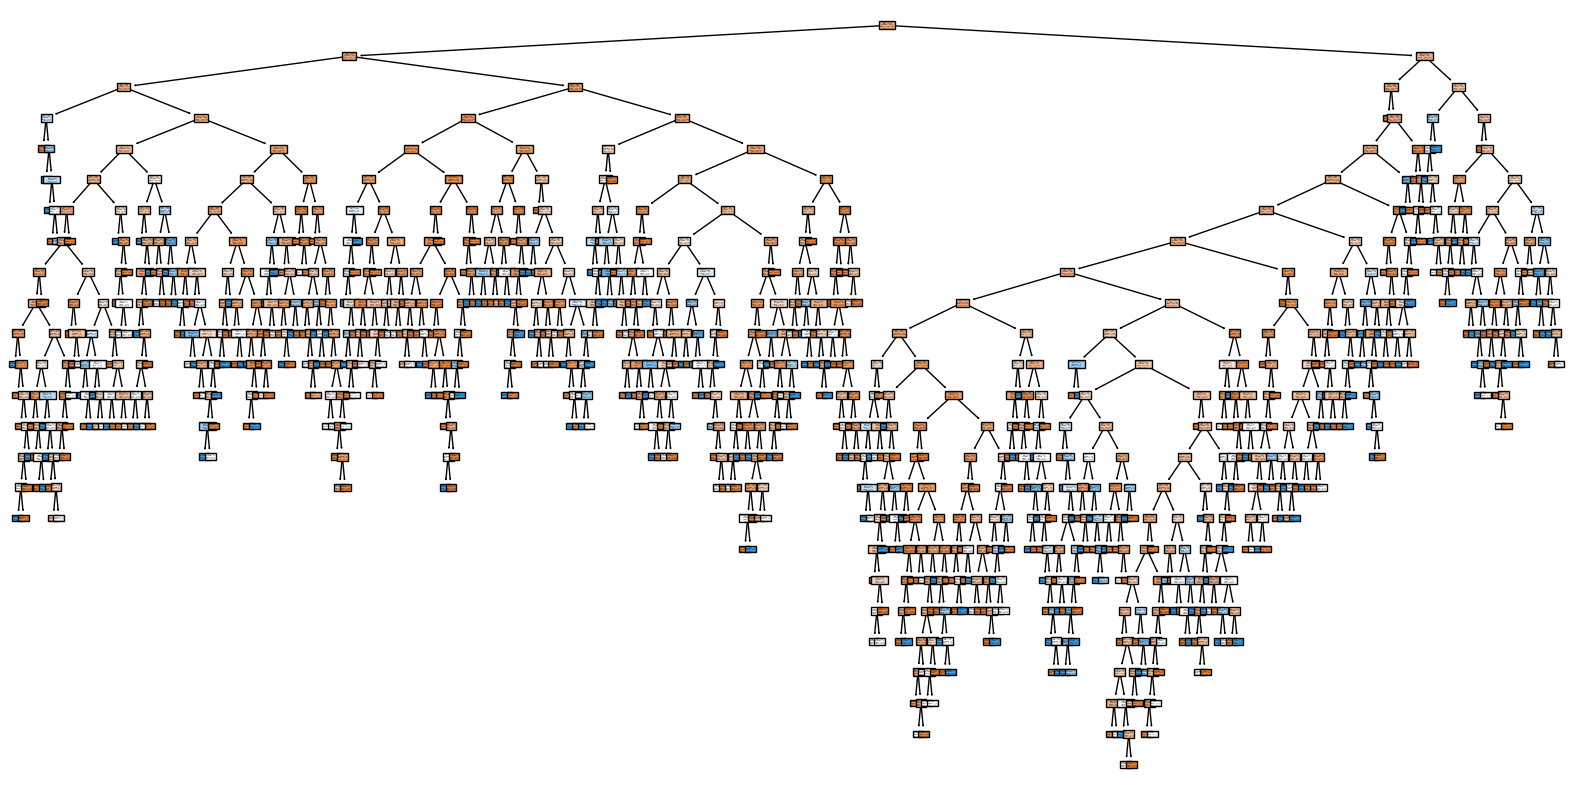

In [74]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder


# Convert k4 to binary target variable
target = (k4 == 3).astype(int)  # True/False to 1/0

# Prepare features
features = mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']].copy()

# Encode categorical variables
le_gender = LabelEncoder()
features['Gender'] = le_gender.fit_transform(features['Gender'])

le_like = LabelEncoder()
features['Like'] = le_like.fit_transform(features['Like'])

le_visit_frequency = LabelEncoder()
features['VisitFrequency'] = le_visit_frequency.fit_transform(features['VisitFrequency'])

# Fit the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(features, target)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns, class_names=['Not 3', '3'], filled=True)
plt.show()


In [76]:
k4 = pd.Series(k4, name='Cluster')

# Map VisitFrequency string values to numerical values
visit_frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
mcdonalds['VisitFrequencyNum'] = mcdonalds['VisitFrequency'].map(visit_frequency_mapping)

# Create a DataFrame with VisitFrequency and Cluster
df = pd.DataFrame({
    'VisitFrequencyNum': mcdonalds['VisitFrequencyNum'],
    'Cluster': k4
})

# Calculate mean VisitFrequency for each cluster
visit_mean = df.groupby('Cluster')['VisitFrequencyNum'].mean()

# Convert the result to a dictionary for a similar output to R's `tapply`
visit_mean_dict = visit_mean.to_dict()

print(visit_mean_dict)


{1: 2.363888888888889, 2: 2.363157894736842, 3: 2.414772727272727, 4: 2.3933518005540164}


In [80]:
# Example data for k4 and mcdonalds
k4 = pd.Series(k4, name='Cluster')

# Create a function to extract the numerical value from the Like string
def extract_like_value(like_str):
    import re
    match = re.search(r'([-+]?\d+)', like_str)
    if match:
        return int(match.group(1))
    else:
        return np.nan

# Apply the function to the Like column
mcdonalds['LikeNum'] = mcdonalds['Like'].apply(extract_like_value)

# Create a DataFrame with LikeNum and Cluster
df = pd.DataFrame({
    'LikeNum': mcdonalds['LikeNum'],
    'Cluster': k4
})

# Calculate mean LikeNum for each cluster
like_mean = df.groupby('Cluster')['LikeNum'].mean()

# Convert the result to a dictionary for a similar output to R's `tapply`
like_mean_dict = like_mean.to_dict()

print(like_mean_dict)


{1: 0.6611111111111111, 2: 0.9210526315789473, 3: 0.7443181818181818, 4: 0.7728531855955678}


In [81]:
k4 = pd.Series(k4, name='Cluster')

# Create a DataFrame with Gender and Cluster
df = pd.DataFrame({
    'Gender': mcdonalds['Gender'],
    'Cluster': k4
})

# Convert 'Gender' to binary where Female is 1 and Male is 0
df['Female'] = (df['Gender'] == 'Female').astype(int)

# Calculate mean proportion of females for each cluster
female_mean = df.groupby('Cluster')['Female'].mean()

# Convert the result to a dictionary for a similar output to R's `tapply`
female_mean_dict = female_mean.to_dict()

print(female_mean_dict)


{1: 0.6055555555555555, 2: 0.5552631578947368, 3: 0.48579545454545453, 4: 0.5207756232686981}


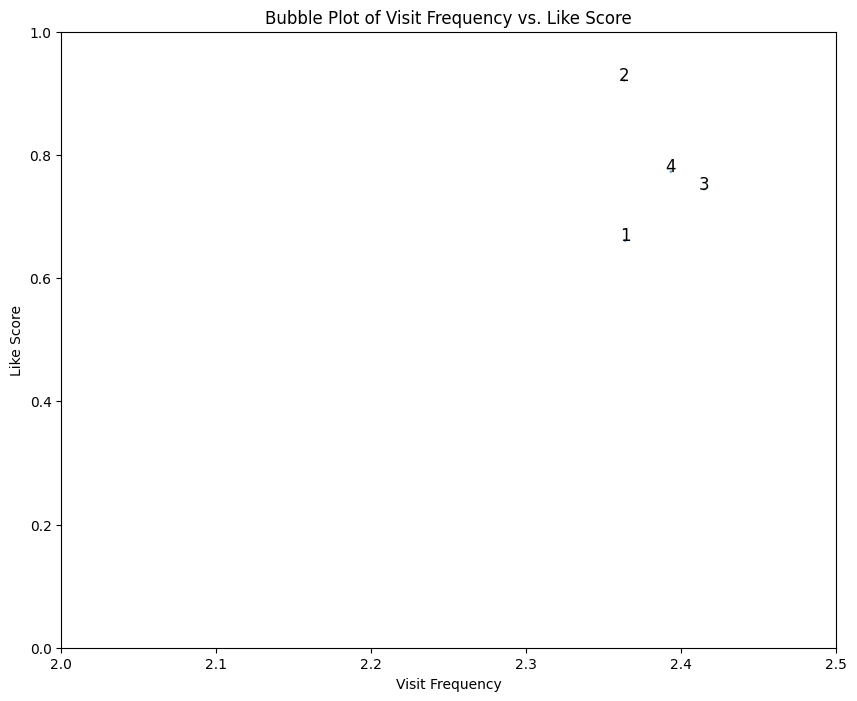

In [82]:
# Convert dictionaries to Series
visit = pd.Series(visit_mean_dict)
like = pd.Series(like_mean_dict)
female = pd.Series(female_mean_dict)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(visit, like, s=10 * female, alpha=0.7, edgecolors='w', linewidth=0.5)

# Add labels
for i in range(len(visit)):
    plt.text(visit.iloc[i], like.iloc[i], str(i + 1), fontsize=12, ha='center')

plt.xlim(2, 2.5)
plt.ylim(0, 1)
plt.xlabel('Visit Frequency')
plt.ylabel('Like Score')
plt.title('Bubble Plot of Visit Frequency vs. Like Score')
plt.show()
